# Import all required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import titanic dataset and read

In [2]:
data=pd.read_excel(r"C:\Users\shank\Downloads\Titanic (1).xlsx",sheet_name="Sheet1")
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
data.drop(["PassengerId","Ticket"],axis=1,inplace=True)
data.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S


# Check the data size

In [4]:
data.shape

(891, 10)

# Remove all duplicated data

In [5]:
data.duplicated().sum()

0

# Check the percentage of missing values

In [6]:
((data.isna().sum())/data.shape[0])*100

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

# Dataset information

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


Here I see total number of entries 891
columns'Age','Cabin'and 'Embarked' have missing values.
'Age' columns has total 177 missing values,column 'Cabin' has total 687 missing values and column Embarked has 2
missing values.

# Describe the dataset for understanding the statistical knowledge about all numerical variables

In [8]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In this dataset

1.38.3% people were survived

2.most of the passenger were traveling in 3rd pclass

3.50% of passenger age were 20 to 38

In [9]:
data.select_dtypes([float,int]).count()

Survived    891
Pclass      891
Age         714
SibSp       891
Parch       891
Fare        891
dtype: int64

In [10]:
data.select_dtypes(object).count()

Name        891
Sex         891
Cabin       204
Embarked    889
dtype: int64

# Find missing values index and fill them

In [11]:
ageindex=data[data['Age'].isna()].index

In [12]:
ageindex

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [13]:
ageavg=data['Age'].median()
ageavg

28.0

In [14]:
data.loc[ageindex,"Age"]=ageavg

In [15]:
data['Age'].isna().sum()

0

In [16]:
data.drop("Cabin",axis=1,inplace=True)

Here I droped column "Cabin" it has 687 missing values out of 891 rowes .And the "Cabin" column it is not giving any
usefull information for our model that why I thing it would be better oppition if i droup "Cabin" column.

In [17]:
data.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S


In [18]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Here I checked the data frequency after I fill the data in "Embarked" column because in this column has two missing values.

In [19]:
dataindex=data[data["Embarked"].isna()].index
dataindex

Int64Index([61, 829], dtype='int64')

In [20]:
data.loc[dataindex,"Embarked"]="S"

In [21]:
data['Embarked'].isna().sum()

0

In [22]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Data Visualization

Text(0.5, 1.0, 'Total numbers of passengers survived')

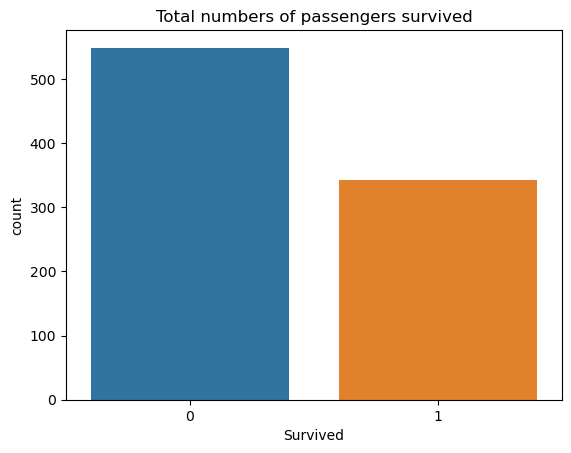

In [23]:
sns.countplot(data,x="Survived")
plt.title("Total numbers of passengers survived")

In this countplot I can see 549 passengers were died and only 342 passengers were survived out of 891 passengers.

In [24]:
filter_data=data[data['Sex'].isin(['male']) & data['Survived'].isin([0])]
filter_data.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
5,0,3,"Moran, Mr. James",male,28.0,0,0,8.4583,Q


In [25]:
total_male_died=len(filter_data)
total_rows=len(data)
total_male=round((total_male_died/total_rows)*100,2)

In [26]:
total_male

52.53

In [27]:
filterdata=data[data['Sex'].isin(['female']) & data['Survived'].isin([0])]
filterdata.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
14,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,7.8542,S
18,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,18.0000,S
24,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,21.0750,S


In [28]:
t_fmale_died=len(filterdata)
t_rows=len(data)
total_fmale=round((t_fmale_died/t_rows)*100,2)

In [29]:
total_fmale

9.09

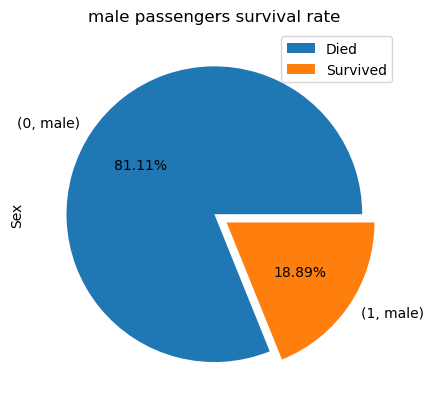

In [30]:
data[data['Sex']=="male"].groupby("Survived")['Sex'].value_counts().plot(kind="pie",autopct="%.2f%%",explode=[0,0.1])
plt.title("male passengers survival rate")
plt.legend(["Died","Survived"])
plt.show()

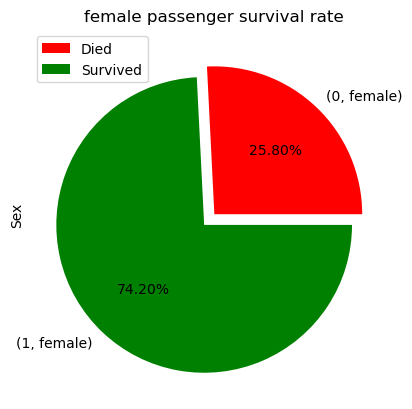

In [31]:
data[data["Sex"]=="female"].groupby("Survived")["Sex"].value_counts().plot(kind="pie",autopct="%.2f%%",colors=["red","green"],explode=[0,0.1])
plt.title("female passenger survival rate")
plt.legend(["Died","Survived"])
plt.show()

From this plot I realize that 74.20% female were survived and 25.80% female passengers were not survived. 

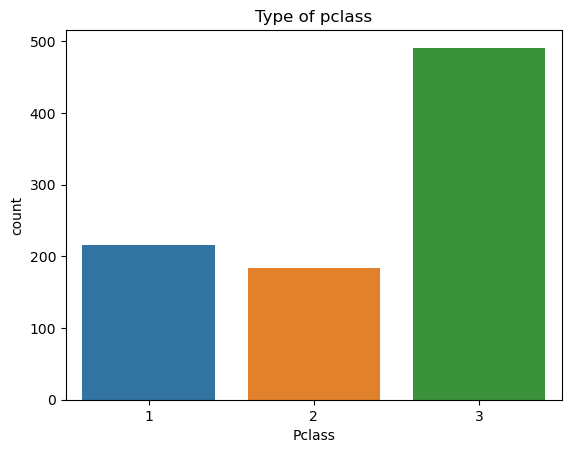

In [32]:
sns.countplot(data,x="Pclass")
plt.title("Type of pclass")
plt.show()

Most of the passengers were traveled in 3rd pclass.

In [33]:
pd.crosstab(index=[data.Sex,data.Survived],columns=[data.Pclass],margins=True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

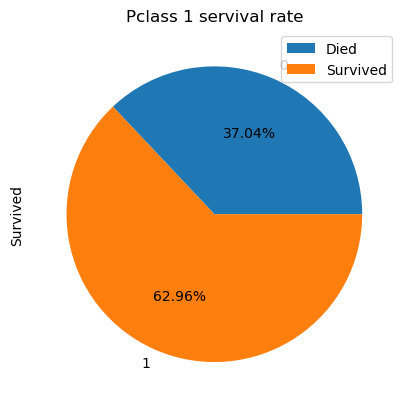

In [34]:
data[data["Pclass"]==1].Survived.groupby(data.Survived).count().plot(kind="pie",autopct="%.2f%%")
plt.legend(['Died','Survived'])
plt.title("Pclass 1 servival rate")
plt.show()

In this pie plot I can see ratio of passengers 37% passengers who were travaled pclass 1 were died and almost 63% passengers were survived.

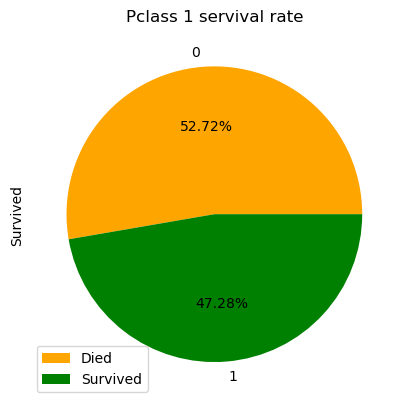

In [35]:
data[data["Pclass"]==2].Survived.groupby(data.Survived).count().plot(kind="pie",autopct="%.2f%%",colors=["orange","green"])
plt.title("Pclass 1 servival rate")
plt.legend(["Died","Survived"])
plt.show()

Here I can see 52.72% passengers were died and 47.28% passengers were survived who were traveled in 2nd class.

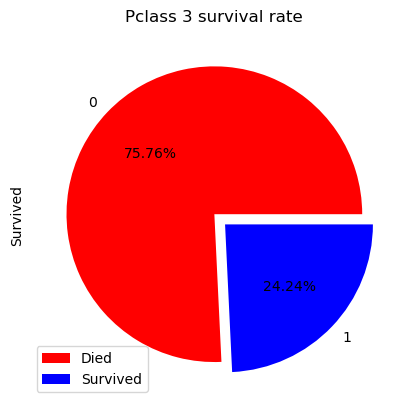

In [36]:
data[data["Pclass"]==3].Survived.groupby(data.Survived).count().plot(kind="pie",autopct="%.2f%%",colors=["red","blue"],explode=[0,0.1])
plt.title("Pclass 3 survival rate")
plt.legend(["Died","Survived"])
plt.show()

In pclass 3 more numbers of passengers were died as compare to pclass 1 and 2.Here in pclass 3 75.76% passengers were died
and only 24.24% passengers were survived.

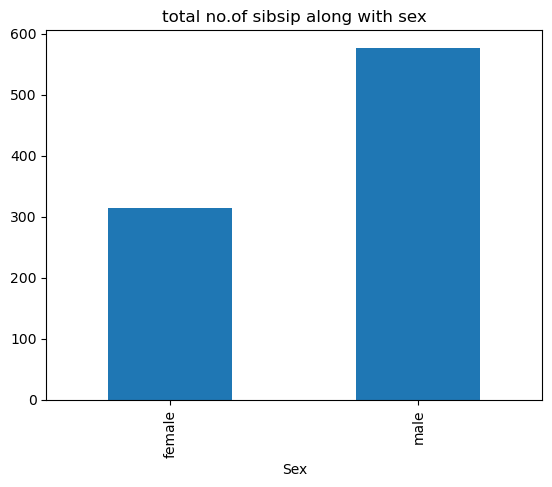

In [37]:
data.groupby("Sex")["SibSp"].count().plot(kind="bar")
plt.title("total no.of sibsip along with sex")
plt.show()

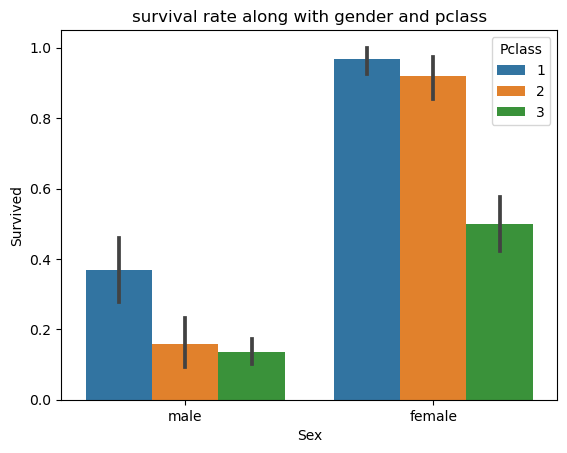

In [38]:
sns.barplot(data,x="Sex",y="Survived",hue="Pclass")
plt.title("survival rate along with gender and pclass")
plt.show()

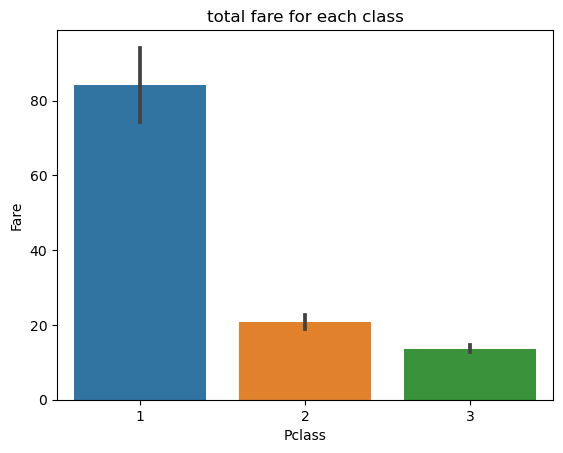

In [39]:
sns.barplot(data,x="Pclass",y="Fare")
plt.title("total fare for each class")
plt.show()

In my point of view I can see that embarked from port s passengers were more survived as compair to port c and port q
and the less then passengers have survived in port q.

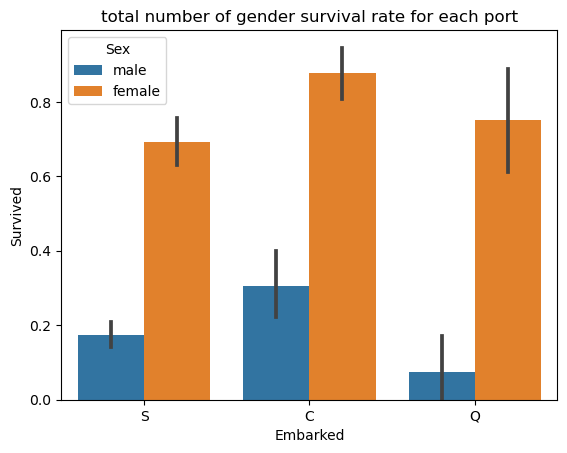

In [40]:
sns.barplot(data,x="Embarked",y="Survived",hue="Sex")
plt.title("total number of gender survival rate for each port")
plt.show()

In this bar plot I can see that those passengers were taveled from enbarked port C their suevived rate were high
as compair to embarked port s and q.

C:\Users\shank\AppData\Local\Temp\ipykernel_32412\2794569428.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap="summer")


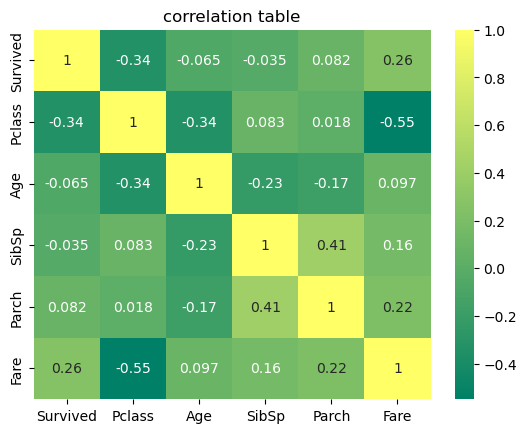

In [41]:
sns.heatmap(data.corr(),annot=True,cmap="summer")
plt.title("correlation table")
plt.show()

In this coirrelation table I have statistically realized that here sibsp coloumn and parch have positive correlationship
and it will empact on the traget variable.During the rescue opperation there were no given priority on age basis passengers.
And fare and pclass should have been positive correlation.And column age and fare have very weak positive correlationship
because it close to zero.

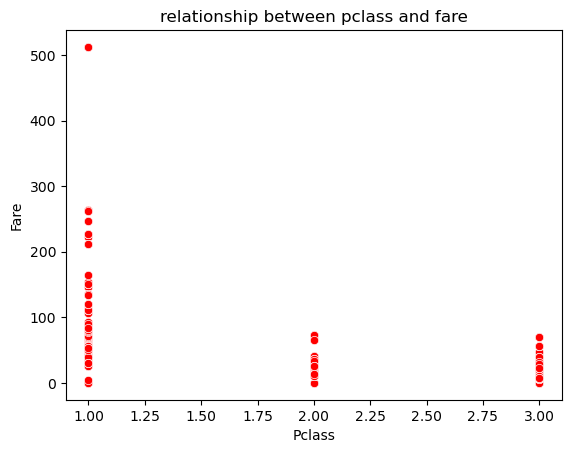

In [42]:
sns.scatterplot(data,x="Pclass",y="Fare",color="red")
plt.title("relationship between pclass and fare")
plt.show()

Here I can see column "Pclass" and column "Fare" have negative correlation.Both columns data moving the oppsite direction
its means statistically insignificant.

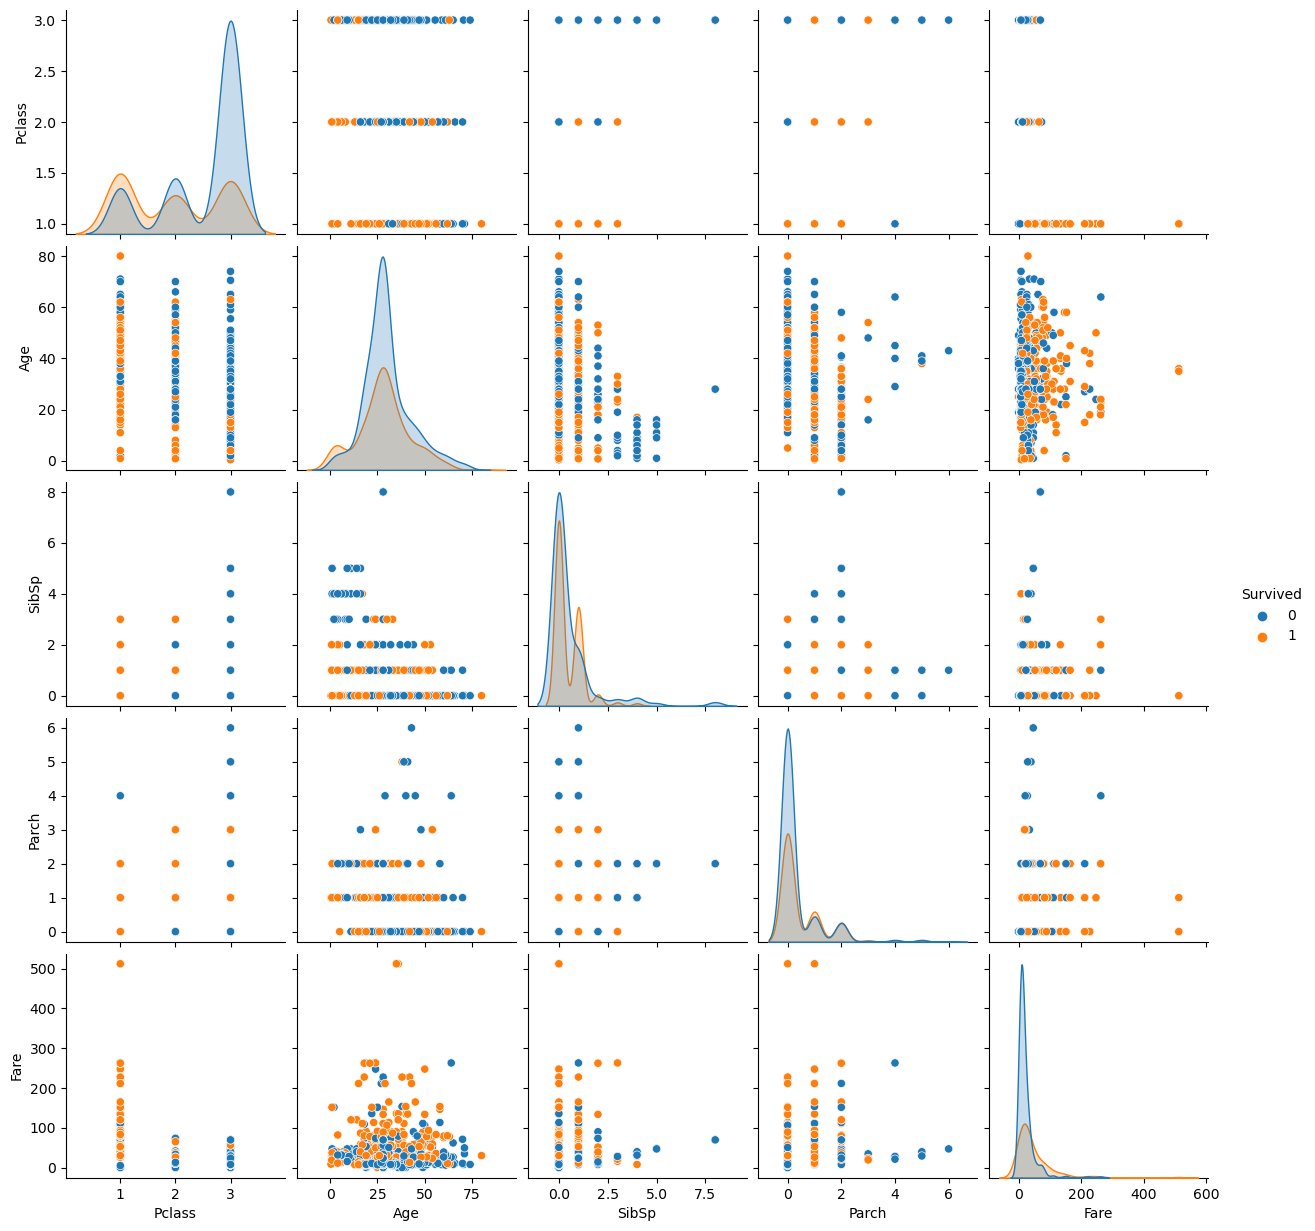

In [43]:
sns.pairplot(data,hue="Survived")
plt.show()

I have plot pairplot for all numerical variables together based on column "Survived".Blue dot indicates passengers who
were not survived and orange dot indicates passengers who were survived.We easily understand that which column passengers
were survived more and which column passengers were not survived more. 

In [44]:
def change(Sex):
    if Sex=="male":
        return 1
    else:
        return 0

In [45]:
data['Sex']=data.Sex.map(change)

In [46]:
data.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,S


# Using machine learning

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Applying logisticregression to predict survived based on gender

In [48]:
x_sex=data[['Sex']]
y=data['Survived']

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x_sex,y,test_size=0.30,random_state=1)

In [50]:
logreg=LogisticRegression()

In [52]:
logreg.fit(x_sex,y)
y_pradict=logreg.predict(x_sex)
(y==y_pradict).mean()

0.7867564534231201

# Applying logisticregression to predict survival rate based on age

In [53]:
x_age=data[["Age"]]#predictor variable
y=data["Survived"]#target variable

In [55]:
logreg.fit(x_age,y)#use fit method to train
y_predict=logreg.predict(x_age)
(y==y_predict).mean()

0.6161616161616161

# Applying logisticregression to predict survival rate based on fare

In [56]:
x_fare=data[['Fare']]
y=data['Survived']
logreg.fit(x_fare,y)
y_pradict=logreg.predict(x_fare)
(y==y_pradict).mean()

0.6655443322109988